# Predicting The Quality of Red Wine using Machine Leaning

## Libraries and Dataset

In [179]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import statistics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
import joblib

In [180]:
data = pd.read_csv('Data/winequality-red.csv')
df_data = pd.DataFrame(data)
df = data.copy()

In [181]:
df_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Data Check

In [182]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [183]:
df_data.duplicated().sum()

np.int64(240)

## Data Preprocessing / Cleaning

### Duplicates Fix

In [184]:
df.drop_duplicates(inplace=True)

### Outlier fix

In [185]:
def find_anomalies(df):
    anomalies = []
    random_data_std = statistics.stdev(df)
    random_data_mean = statistics.mean(df)
    anomaly_cut_off =random_data_std * 3
    lower_limit = random_data_mean - anomaly_cut_off
    upper_limit = random_data_mean + anomaly_cut_off
    for outlier in df:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

#### Fixed Acidity

In [186]:
fa = find_anomalies(df['fixed acidity'])
df = df[~df['fixed acidity'].isin(fa)]


#### Volatile Acidity

In [187]:
vol_acidity = find_anomalies(df['volatile acidity'])
vol = pd.DataFrame(vol_acidity)
vol.drop_duplicates(inplace=True)
df = df[~df['volatile acidity'].isin(vol_acidity)]

#### Citric Acid

In [188]:
citric = find_anomalies(df['citric acid'])
df = df[~df['citric acid'].isin(citric)]

#### Residual Sugar

In [189]:
res_sugar = find_anomalies(df['residual sugar'])
res_sugar_df = pd.DataFrame(res_sugar)
res_sugar_df.drop_duplicates(inplace=True)
df = df[~df['residual sugar'].isin(res_sugar)]

#### Chlorides

In [190]:
chl = find_anomalies(df['chlorides'])
df = df[~df['chlorides'].isin(chl)]

#### Free Sulfur Dioxide

In [191]:
fsd = find_anomalies(df['free sulfur dioxide'])
fsd_df = pd.DataFrame(fsd)
fsd_df.drop_duplicates(inplace=True)  
df = df[~df['free sulfur dioxide'].isin(fsd)]

#### Total Sulfur Dioxide

In [192]:
tsd = find_anomalies(df['total sulfur dioxide'])
tsd_df = pd.DataFrame(tsd)
tsd_df.drop_duplicates(inplace=True)
df = df[~df['total sulfur dioxide'].isin(tsd)]

#### Density

In [193]:
density = find_anomalies(df['density'])
df = df[~df['density'].isin(density)]

#### pH Level

In [194]:
ph = find_anomalies(df['pH'])
df = df[~df['pH'].isin(ph)]

#### Sulphates

In [195]:
sulph = find_anomalies(df['sulphates'])
sulph_df = pd.DataFrame(sulph)
sulph_df.drop_duplicates(inplace=True)
df = df[~df['sulphates'].isin(sulph)]

#### Alcohol

In [196]:
alcohol = find_anomalies(df['alcohol'])
alcohol_df = pd.DataFrame(alcohol)
alcohol_df.drop_duplicates(inplace=True)
df = df[~df['alcohol'].isin(alcohol)]

### Feature Binning

In [197]:
labels = ['0-4.5', '4.5-6.5', '6.5-8']
bins = [0, 4.5, 6.5, 8]
df['quality bins'] = pd.cut(df.quality, bins, labels=labels, include_lowest=True)
df['quality bins'] = df['quality bins'].astype('category')
df['quality bins'] = df['quality bins'].map({'0-4.5': 0, '4.5-6.5': 1, '6.5-8': 2})

In [198]:
df['quality bins'].value_counts()

quality bins
1    995
2    167
0     53
Name: count, dtype: int64

## Exploratory Data Analysis / Visualization

### Correlations

In [199]:
selected_cols = df.drop(['quality bins', 'pH', 'residual sugar', 'free sulfur dioxide'], axis=1)
selected_cols.corr()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
fixed acidity,1.000000,-0.302302,0.696906,0.167865,-0.103290,0.654644,0.213940,-0.026301,0.128734
volatile acidity,-0.302302,1.000000,-0.591299,0.081334,0.103076,0.007210,-0.345721,-0.214173,-0.370696
citric acid,0.696906,-0.591299,1.000000,0.099621,0.002115,0.354237,0.313415,0.164481,0.239893
chlorides,0.167865,0.081334,0.099621,1.000000,0.049007,0.312344,0.041743,-0.209475,-0.129529
total sulfur dioxide,-0.103290,0.103076,0.002115,0.049007,1.000000,0.116929,-0.055754,-0.258743,-0.199057
density,0.654644,0.007210,0.354237,0.312344,0.116929,1.000000,0.113256,-0.496040,-0.196289
sulphates,0.213940,-0.345721,0.313415,0.041743,-0.055754,0.113256,1.000000,0.256993,0.395932
alcohol,-0.026301,-0.214173,0.164481,-0.209475,-0.258743,-0.496040,0.256993,1.000000,0.495789
quality,0.128734,-0.370696,0.239893,-0.129529,-0.199057,-0.196289,0.395932,0.495789,1.000000


### HeatMap

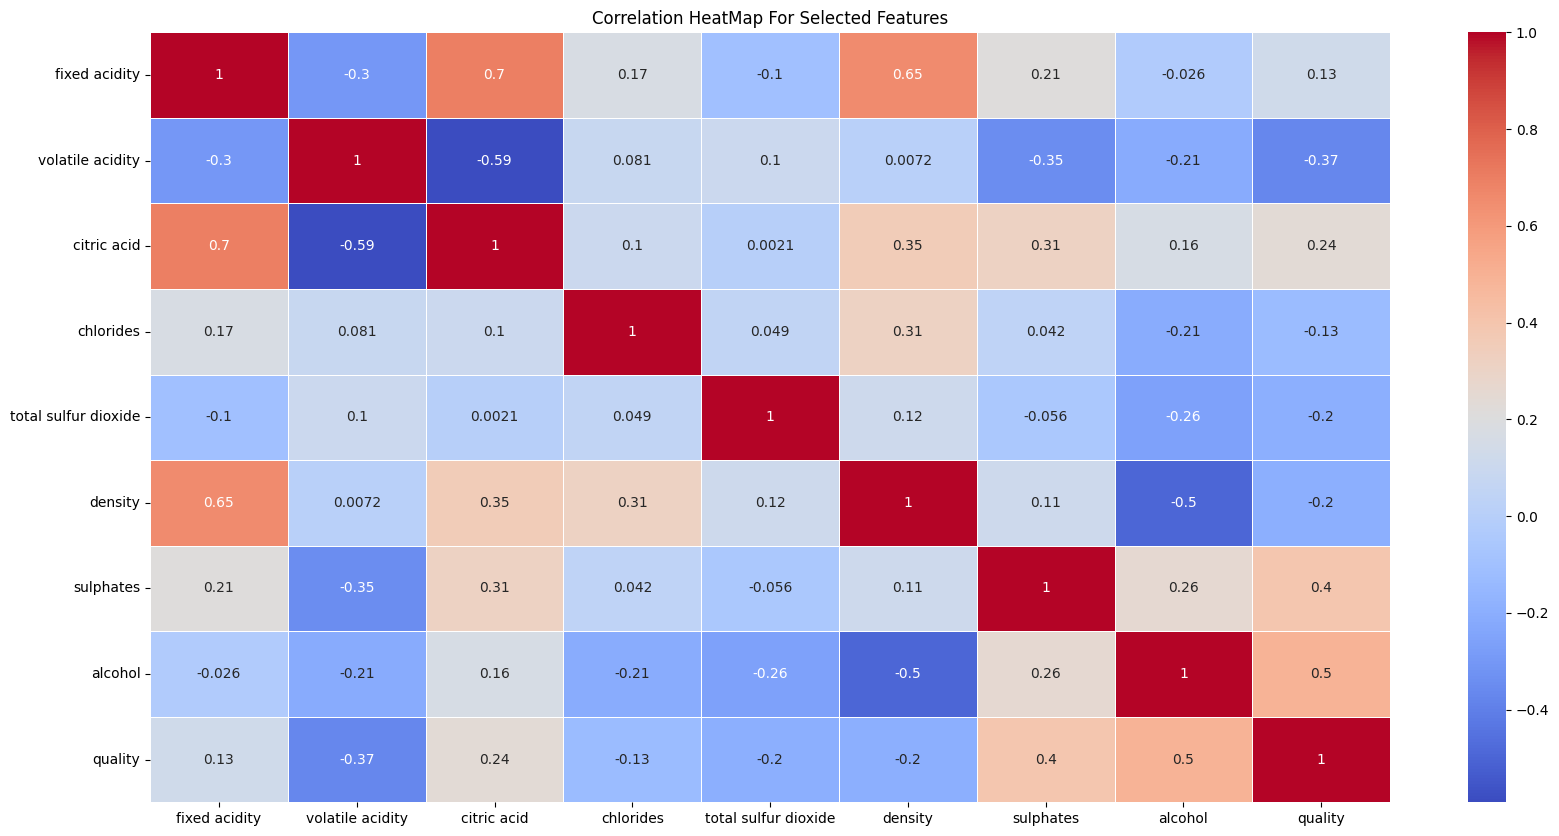

In [200]:
plt.figure(figsize=(20, 10))
sns.heatmap(selected_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation HeatMap For Selected Features")
#plt.savefig('HeatMap: Selected Features.png')
plt.show()

### Quality vs Alcohol

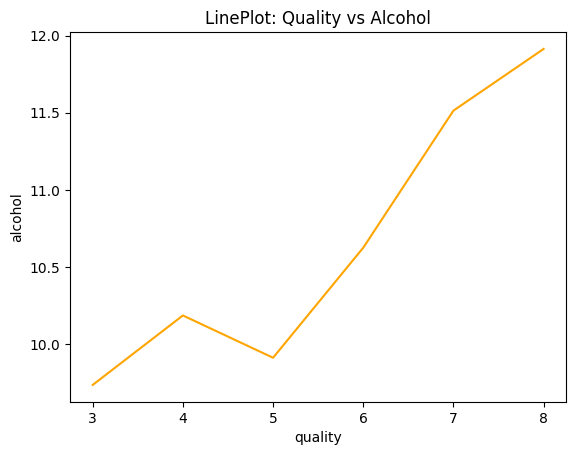

In [201]:
sns.lineplot(x='quality', y='alcohol', data=df, color='orange', errorbar=None)
plt.title('LinePlot: Quality vs Alcohol')
#plt.savefig('LinePlot: quality vs alcohol.png')
plt.show()

Text(0.5, 1.0, 'BarPlot: quality vs alcohol')

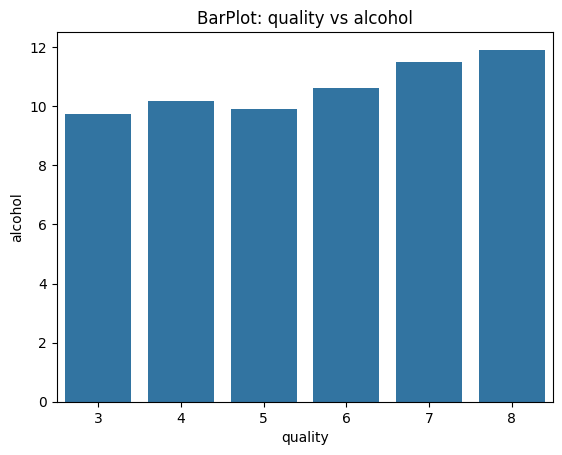

In [202]:
sns.barplot(x='quality', y='alcohol', data=df, errorbar=None)
plt.title('BarPlot: quality vs alcohol')
#plt.savefig('BarPlot for quality vs alcohol.png')

Text(0.5, 1.0, 'HistPlot: Quality Bins')

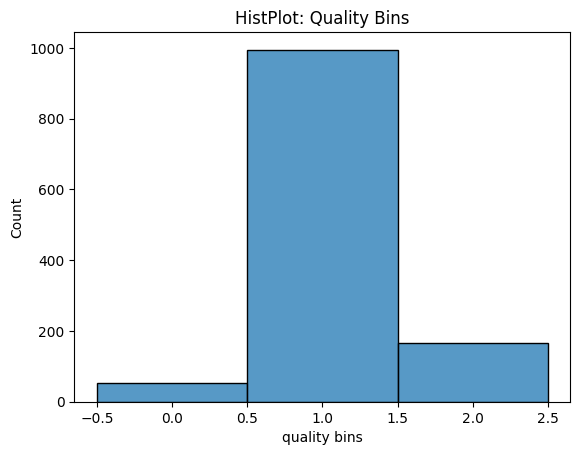

In [203]:
sns.histplot(df['quality bins'])
plt.title('HistPlot: Quality Bins')
#plt.savefig('HistPlot: Quality Bins.png')

### Quality vs Volatile Acidity

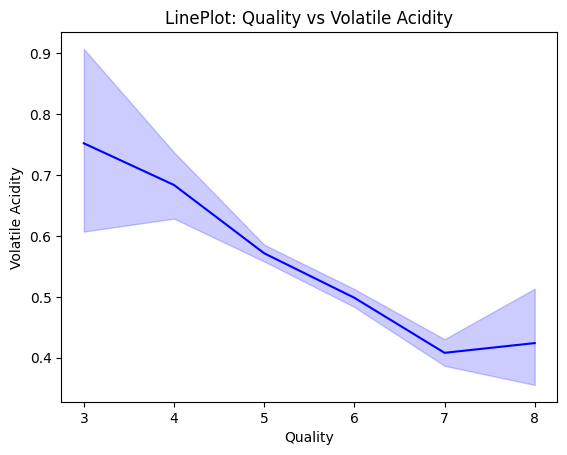

In [204]:
sns.lineplot(x='quality', y='volatile acidity', data=df, color=('blue'))
plt.title('LinePlot: Quality vs Volatile Acidity')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
#plt.savefig('LinePlot: Quality vs Volatile Acidity.png')
plt.show()

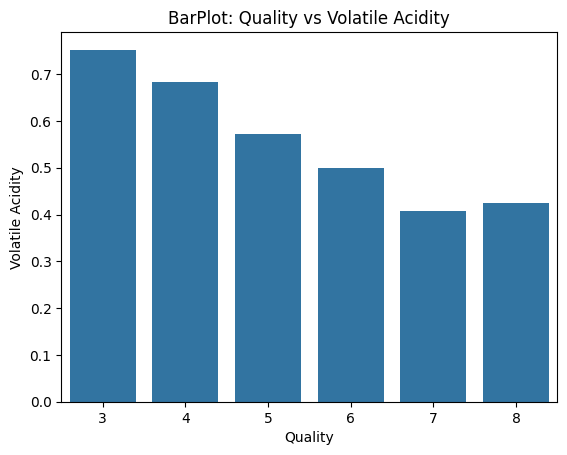

In [205]:
sns.barplot(x='quality', y='volatile acidity', data=df, errorbar=None)
plt.title('BarPlot: Quality vs Volatile Acidity')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
#plt.savefig('BarPlot: Quality vs Volatile Acidity.png')
plt.show()

### PairPlot for selected Features

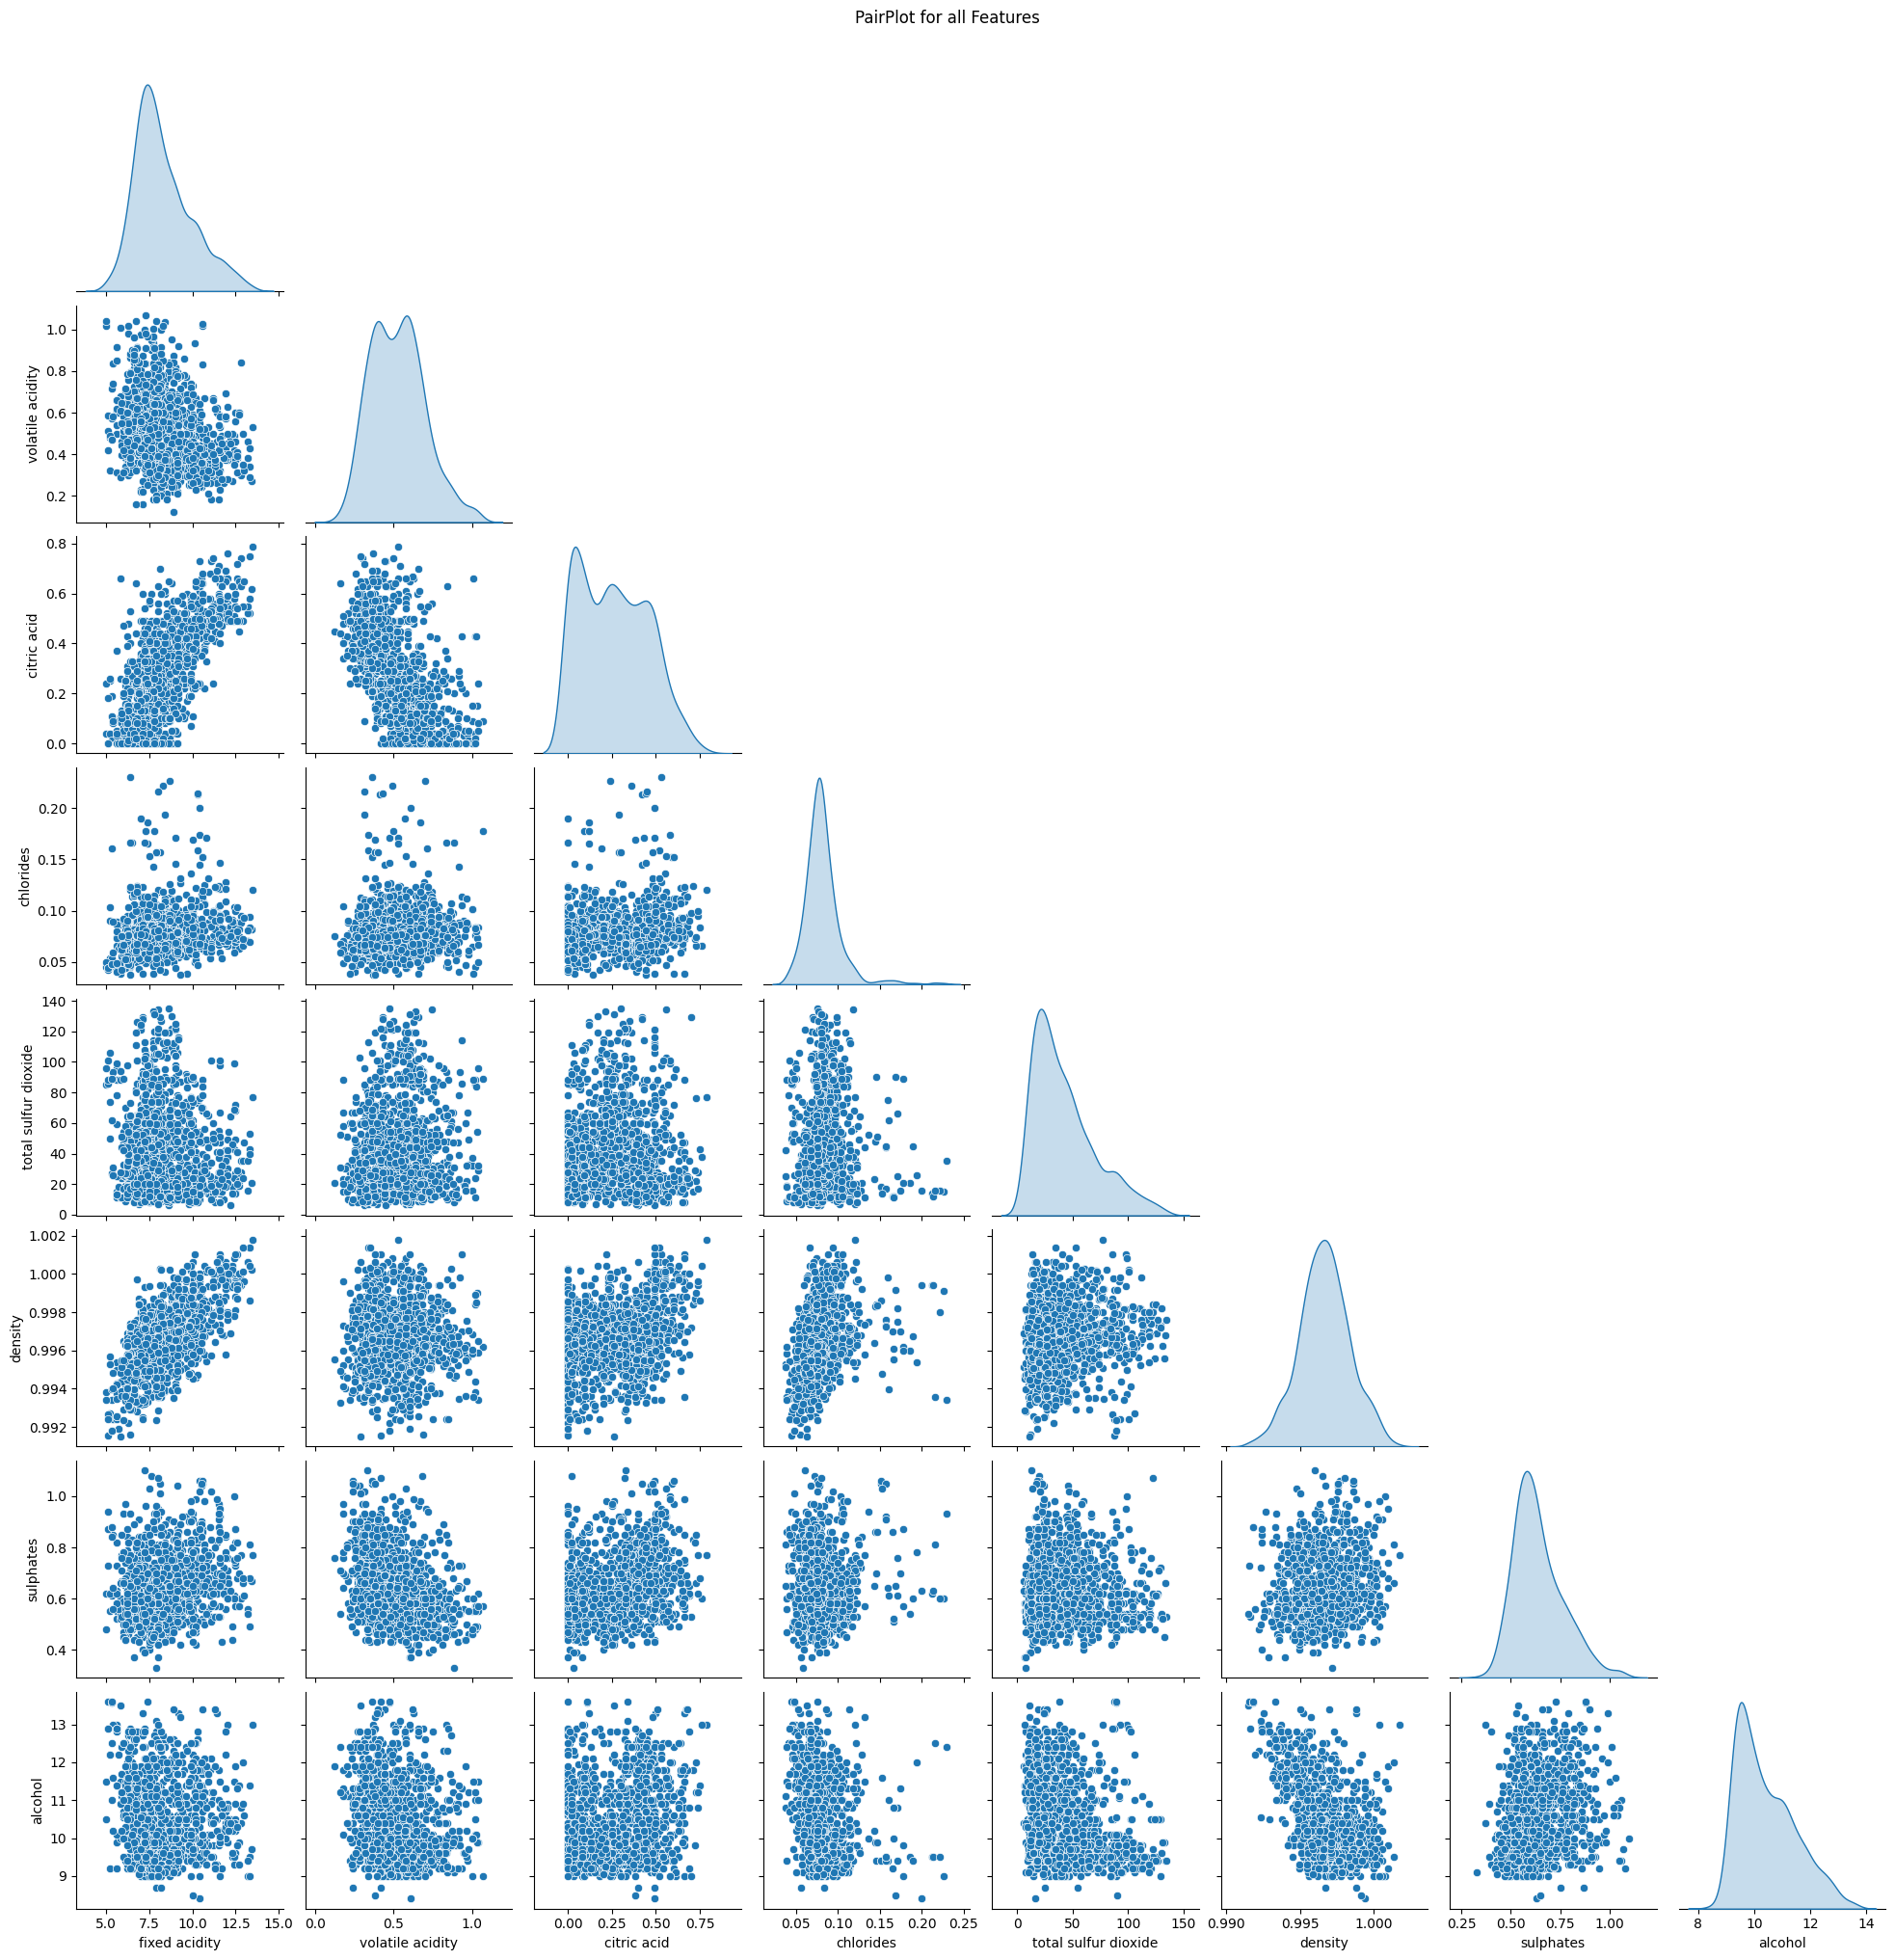

In [206]:
sns.pairplot(selected_cols.drop('quality', axis=1), diag_kind='kde', corner=True)
plt.suptitle("PairPlot for all Features", y=1.02)
#plt.savefig('PairPlot for the selected features.png')
plt.show()

## Machine Learning Model

### Feature Selection

In [207]:
X = df.drop(['quality', 'quality bins', 'fixed acidity', 'free sulfur dioxide', 'residual sugar'], axis=1)
y = df['quality bins']

### Train Test Split

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=np.random.RandomState(32))

### Model Building

#### Random Forest Classifier

In [209]:
rf_model = RandomForestClassifier(n_estimators=300, random_state=np.random.RandomState(32))
rf_model.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [210]:
y_pred = rf_model.predict(X_test)

In [211]:
print(f"The Accuracy Score is: {accuracy_score(y_test, y_pred):.2f}")
print("\nThe Confusion Matrix is:\n", confusion_matrix(y_test, y_pred))
print("\nThe Classification Report is:\n", classification_report(y_test, y_pred))
print(f"Training set Score: {rf_model.score(X_train, y_train):.2f}")
print(f"Test set Score: {rf_model.score(X_test, y_test):.2f}")

The Accuracy Score is: 0.86

The Confusion Matrix is:
 [[  1  10   0]
 [  0 293  11]
 [  0  30  20]]

The Classification Report is:
               precision    recall  f1-score   support

           0       1.00      0.09      0.17        11
           1       0.88      0.96      0.92       304
           2       0.65      0.40      0.49        50

    accuracy                           0.86       365
   macro avg       0.84      0.48      0.53       365
weighted avg       0.85      0.86      0.84       365

Training set Score: 1.00
Test set Score: 0.86


In [222]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False, ignore_index=True)
feature_importance

,Feature,Importance
0,alcohol,0.163413
1,sulphates,0.144993
2,volatile acidity,0.136476
3,density,0.119292
4,citric acid,0.116497
5,chlorides,0.112402
6,total sulfur dioxide,0.108805
7,pH,0.098122


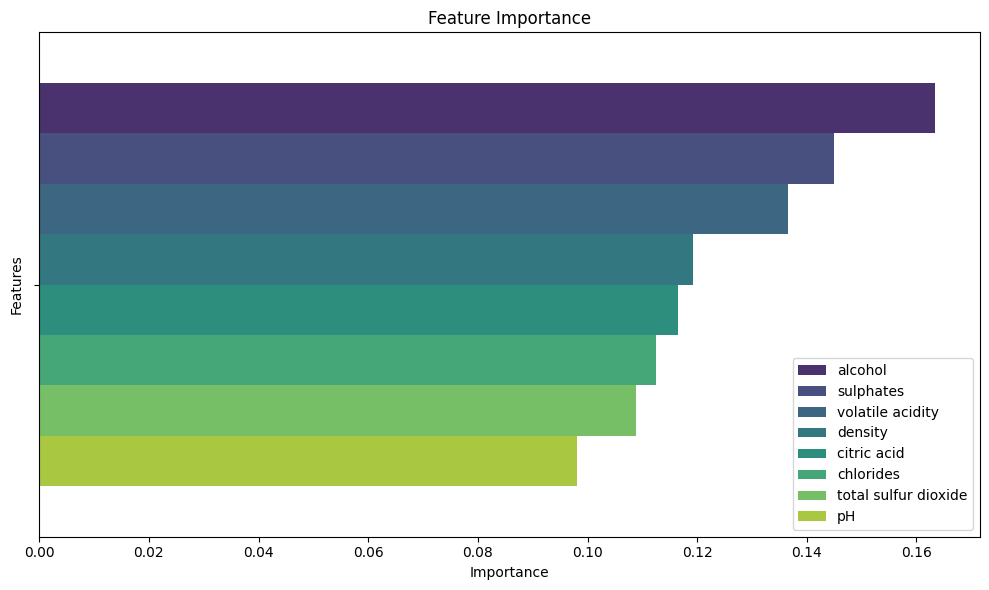

In [213]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', hue='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.legend()
plt.tight_layout()
#plt.savefig("Feature_Importance.png")
plt.show()

#### Decision Tree

In [214]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=100)
dt_model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,100
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [215]:
dt_pred = dt_model.predict(X_test)

In [216]:
print(f"The Accuracy Score is: {accuracy_score(y_test, dt_pred):.2f}")
print("\nThe Classification Report is:\n", classification_report(y_test, dt_pred))
print(f"Training set Score: {dt_model.score(X_train, y_train):.2f}")
print(f"Test set Score: {dt_model.score(X_test, y_test):.2f}")

The Accuracy Score is: 0.85

The Classification Report is:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.88      0.95      0.91       304
           2       0.64      0.42      0.51        50

    accuracy                           0.85       365
   macro avg       0.50      0.46      0.47       365
weighted avg       0.82      0.85      0.83       365

Training set Score: 0.84
Test set Score: 0.85


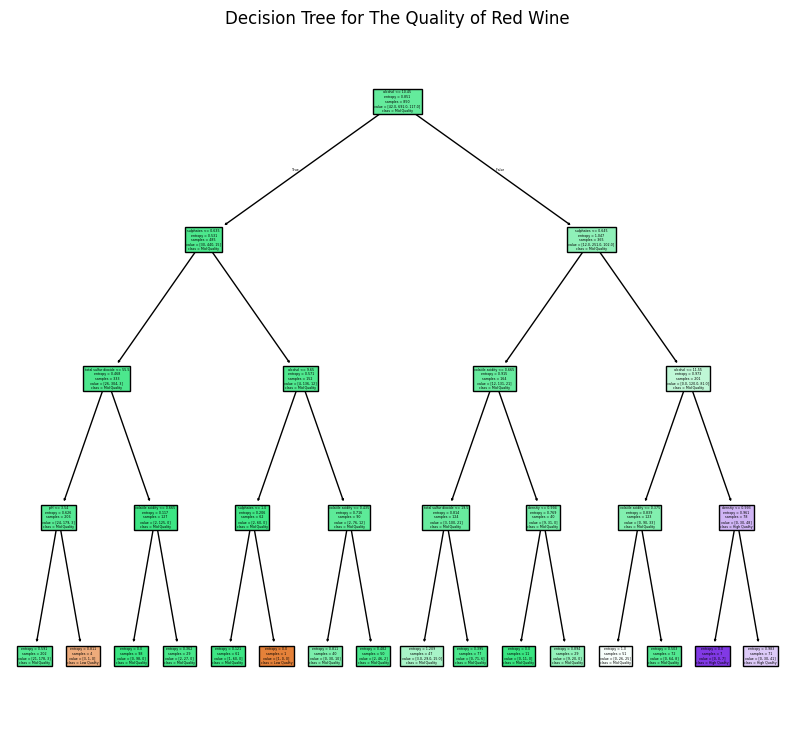

In [217]:
plt.figure(figsize=(10, 9))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Low Quality', 'Mid Quality', 'High Quality'])
plt.title('Decision Tree for The Quality of Red Wine')
#plt.savefig('Decision Tree for Quality of Red Wine.png')
plt.show()

#### Save Models

In [218]:
joblib.dump(rf_model, 'ML Model for Red Wine Prediction.pkl')
joblib.dump(dt_model, 'Decision Tree for Quality of Red Wine.pkl')
feature_columns = X.columns
joblib.dump(feature_columns, 'feature_columns.pkl')

['feature_columns.pkl']

In [219]:
df.to_csv('redwine.csv')

### Predictions

In [220]:
new_input = pd.DataFrame({
    'volatile acidity': [1.58],
    'citric acid': [0.76],
    'chlorides': [0.20],
    'total sulfur dioxide': [120],
    'density': [0.99],
    'pH': [3.31],
    'sulphates': [0.9],
    'alcohol': [6]
})

prediction = rf_model.predict(new_input)
proba = rf_model.predict_proba(new_input).round(1)
df_proba = pd.DataFrame(proba)
quality = np.array(['Low Quality', 'Mid Quality', 'High Quality'])
for i in prediction:
    if i == 0:
        print('The new prediction for the quality of the Red Wine is: Low Quality')
    elif i == 1:
        print("The new prediction for the quality of the Red Wine is: Mid Quality")
    else:
        print("The new prediction for the quality of the Red Wine is: High Quality")
df_proba.columns = ['Low Quality', 'Mid Quality', 'High Quality']
df_proba.rename(columns={0: 'Low Qaulity', 1: 'Mid Quality', 2: 'High Quality'})
df_proba

The new prediction for the quality of the Red Wine is: Mid Quality


,Low Quality,Mid Quality,High Quality
0,0.2,0.5,0.3


### Readme / Insights

In [221]:
with open ('Red Wine Quality Prediction.md', 'w') as f:
    f.write("""
# The Prediction of the quality of Red Wine
**Objective**: Predicting the quality of Red Wine (e.g, Low Quality, Mid Quality and High Quality) using selected features.

**Features**
- Volatile Acidity
- Citric Acid
- Chlorides
- Total Sulfur Dioxide
- Density
- pH
- Sulphates
- Alcohol

**Model**: Random Forest Classifier
- Accuracy Score: {:.2f}
- Confusion Matrix: 
{}
- Classification Report: 
{}
- Training Score: {:.2f}
- Test Score: {:.2f}

**Model**: Decision Tree
- Accuracy Score: {:.2f}
- Classification Report: 
{}
- Training Score: {:.2f}
- Test Score: {:.2f}

**Insights**
- Alcohol has the highest positive correlation with the quality of the Red Wine i.e, The more alcohol in the preparation process, the better the quality of the Red Wine.
- Volatile Acidity has the highest negative correlation with the quality of the Red Wine i.e, Increase in Volatile Acidity decreases the quality of the Red Wine.

**Visualization**
- HeatMap: 'HeatMap: Selected Features.png'
- Quality vs Alcohol: 'LinePlot: Quality vs Alcohol', 'ScatterPlot for quality vs alcohol.png'
- Quality Bins: 'HistPlot: Quality Bins.png'
- Features: 'PairPlot for the selected features.png'
""".format(accuracy_score(y_test, y_pred), str(confusion_matrix(y_test, y_pred)), classification_report(y_test, y_pred), rf_model.score(X_train, y_train), rf_model.score(X_test, y_test),
           accuracy_score(y_test, dt_pred), classification_report(y_test, dt_pred), dt_model.score(X_train, y_train), dt_model.score(X_test, y_test)))